<center>
<img src="logo.png" height="900"> 
</center>


# Много гипотез

В этом домашнем задании мы будем проверять гипотезы. Всего в этой лабораторной работе $7$ задач. Чтобы получить за домашнеее задание положительную оценку, достаточно решить любые $5$ из них. 

In [1]:
import numpy as np
import pandas as pd
 
from scipy import stats
 
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.style.use('ggplot')
%matplotlib inline

# Новый раздел

## Задание 1 (мудрость)

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [2]:
df = pd.read_csv('df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

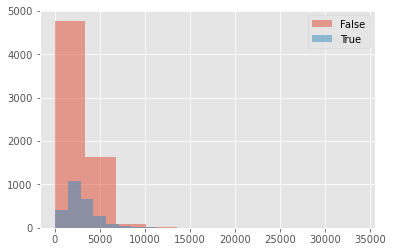

In [3]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
plt.hist(df[df.I==0]['likes'], alpha=0.5, label='False');
plt.hist(df[df.I==1]['likes'], alpha=0.5, label='True');
plt.legend();
# your code here


Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df.groupby('I')['likes'].agg(['mean','median'])

# your code here


,mean,median
I,,
False,2784.043205,2497.0
True,2879.182889,2588.5


Проверьте гипотезу о равенстве среднего числа репостов. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [5]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

alpha = 0.05
nx, ny = df[df.I==0]['likes'].size, df[df.I==1]['likes'].size

diff = df[df.I==1]['likes'].mean() - df[df.I==0]['likes'].mean()
diff_std = np.sqrt(df[df.I==0]['likes'].var(ddof=1)/nx + df[df.I==1]['likes'].var(ddof=1)/ny)

z_obs = diff/diff_std    

# your code here


Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте `p_value` для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
alpha=0.05
z_crit = stats.norm.ppf(1 - alpha/2)
p_value = 2 * (1 - stats.norm().cdf(z_obs))

print(f'Р-значение {p_value:.5}')
print(f'Наблюдаемое значение {z_obs:.5}, больше критического {z_crit:.3} => нулевая гипотеза отвергается')

# your code here


Р-значение 0.0077112
Наблюдаемое значение 2.6645, больше критического 1.96 => нулевая гипотеза отвергается


In [7]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 2.6644610922505323) < 1e-5

# другие подобные тесты скрыты от вас


Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Задание 2  (Тайлер) 

__Люди всё время меня спрашивают, знаю ли я Тайлера Дёрдена?__ Да, знаю. Он делает лучшее мыло в стране. 

__а)__ Тайлер считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Тайлер летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак? 

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
alpha = 0.01 
N=10
s=27
a=25
chi_obs=(N-1)*s/a
chi_crit=stats.chi2(N-1).ppf(1-alpha)
pval1=1 - stats.chi2(N-1).cdf(chi_obs)
 
print(f'Р-значение {pval1:.5}')
print(f'Наблюдаемое значение {chi_obs:.5} меньше критического {chi_crit:.5} => нулевая гипотеза не отвергается')
 
# your code here

Р-значение 0.37362
Наблюдаемое значение 9.72 меньше критического 21.666 => нулевая гипотеза не отвергается


__Наблюдаемое значение статистики меньше критического, следовательно гипотеза о равенстве дисперсий не отвергается.__ 

__б)__ Для того, чтобы уменьшить количество бракованного мыла, Тайлер собирается внедрить новую технологию производства. Тайлер произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
alpha = 0.01                             # уровень значимости = 5%
nx, ny = 100, 100                        # размер выборок
 
F_obs = 6**2/5**2                        # наблюдаемое значение
 
f_rv = stats.f(nx - 1, ny - 1) 
F_crit = f_rv.ppf(1 - alpha)           # критическое значение
pval2 = 1-f_rv.cdf(F_obs)
 
print(f'Р-значение {pval2:.5}')
print(f'Наблюдаемое значение {F_obs:.5} меньше критического {F_crit:.5} => нулевая гипотеза не отвергается')
 
# your code here

Р-значение 0.035573
Наблюдаемое значение 1.44 меньше критического 1.6015 => нулевая гипотеза не отвергается


In [10]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1
 
# другие подобные тесты скрыты от вас

## Задание 3 (рейтинги президентов) 

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [11]:
df = pd.read_csv('presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
melted = pd.melt(df, id_vars='year').sort_values(['year','variable'])
             #,var_name="Person", value_name="Score")
x=melted.set_index(['year', 'variable']).loc[(1969,'Qtr1'):(1972,'Qtr2')].value.dropna().values
 
y=melted.set_index(['year', 'variable']).loc[(1972,'Qtr3'):(1974,'Qtr2')].value.dropna().values
 
# your code here

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

from statsmodels.stats.weightstats import ttest_ind
 
obs, pval, _ = ttest_ind(x, y, value=0, alternative='larger')
 
print(f"Наблюдаемое значение: {obs:.3}") 
print(f"P-значение: {pval:.3}")
 
# your code here

Наблюдаемое значение: 3.56
P-значение: 0.00111


In [14]:
# проверка того, что задание решено верно
 
# другие подобные тесты скрыты от вас 
assert np.abs(obs - 3.5640741313229793) < 1e-5

Снова президентом Никсон станет в $3000$ году. 

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Задание 4 (сон)

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [15]:
df = pd.read_csv('sleep.csv')
df.head(20)

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5
5,3.4,1,6
6,3.7,1,7
7,0.8,1,8
8,0.0,1,9
9,2.0,1,10


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [16]:
x=df[df.group==1].extra.values
y=df[df.group==2].extra.values

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
tobs1, pval1=stats.ttest_1samp(x, 0)
 
# your code here

Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
tobs2, pval2=stats.ttest_rel(y,x, alternative='greater')
 
# your code here

In [19]:
# проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5
 
# другие подобные тесты скрыты от вас

## Задание 5 (say my name)

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей. 

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`. 

In [20]:
df = pd.read_csv('cats_names.csv', sep='\t')
df.head()

,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры: 

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль. 
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы. 

H0: кошка не откликается на своё имя (реакция одинаковая)

H1: кошка откликается на своё имя (реакция выше)

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
noun4=(df[df.stimuli=='Noun 4']['Total Score']>0).astype(int).values
name=(df[df.stimuli=="Test Cat's Name"]['Total Score']>0).astype(int).values
 
n=len(name)
 
b=0
c=0
d=0
for i in range(n):
    if noun4[i]<name[i]:
        c+=1
    elif noun4[i]>name[i]:
        b+=1
    else:
        d+=1
z_obs=(c - b) / np.sqrt(c + b - (c - b)**2 / n )
pval = 1-stats.norm.cdf(z_obs)
print(f"Наблюдаемое значение: {z_obs:.4}") 
print(f"P-значение: {pval:.3}")

# your code here

Наблюдаемое значение: 1.789
P-значение: 0.0368


__Р-значение <0.05, следовательно нулевая гипотеза отвергается.__

In [22]:
# проверка того, что задание решено верно
assert sum(name) == 14
assert np.abs(z_obs - 2.69679) < 1e-5

# другие подобные тесты скрыты от вас 

AssertionError: 

__!В ходе переписки на форуме Coursera преподаватель курса согласился, что верный ответ z_obs=1.789__

Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента. О том, как это можно делать, мы с вами поговорим в будущем. 

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Задание 6

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета. 

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы. 

In [23]:
df = pd.read_csv('matan.csv', sep='\t')
df.head()

,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   is_angry  418 non-null    int64  
 1   target_1  348 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.6 KB


In [25]:
# Заполним пропуски 0
df.fillna(0, inplace=True)

In [26]:
df.groupby('is_angry').target_1.agg(['size','sum','mean'])

,size,sum,mean
is_angry,,,
0,208,150.0,0.721154
1,210,103.0,0.490476


In [27]:
n1, m1, p1=df.groupby('is_angry').target_1.agg(['size','sum','mean']).iloc[0]
n2, m2, p2=df.groupby('is_angry').target_1.agg(['size','sum','mean']).iloc[1]

In [28]:
from statsmodels.stats.proportion import proportions_ztest

alpha = 0.05                                       # уровень значимости = 5%
n_obs = n2, n1                      # размеры выборок
m_obs = m2, m1                    # число успехов

z_obs, p_val =  proportions_ztest(m_obs, n_obs, value=0, 
                                  alternative='larger')
z_obs

-4.824282732247396

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
 
alpha = 0.05                                       # уровень значимости = 5%
                  
diff = p2 - p1                                     # разность долей
 
P = (m1 + m2)/(n1 + n2)          
diff_std = np.sqrt(P*(1 - P)*(1/n1 + 1/n2))        # стандартное отклонение разности
                                    
z_obs = diff/diff_std                              # наблюдаемое значение статистики 

z_obs

# your code here

-4.824282732247396

In [30]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 4.82428)  < 1e-5

# другие подобные тесты скрыты от вас 

## Задание 7

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение. 

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя. А ещё [прочитайте историю](https://absentis.livejournal.com/27153.html) про то, почему Коперник мазал бутеры маслом. 

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
alpha=0.5
n = 200
m = 105
p=105/200
pval = 2*(1-stats.norm.cdf(z_obs))
z_obs = (p-0.5)/np.sqrt(p*(1-p)/n)
z_obs, pval
 
# your code here

(0.7079923254047893, 1.9999985949201358)

In [32]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 0.70799) < 1e-5
 
# другие подобные тесты скрыты от вас

<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars/sem_6/student_teacher_dist.png" height="300" width="600"> 